# Exploratory data analysis - Retail

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Reading the dataset

In [2]:
df = pd.read_csv("D:\Downloads\SampleSuperstore.csv")
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#checking the dataset
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [4]:
#checking the outliers/ missing values
df.shape

(9994, 13)

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


Univariate Analysis

In [9]:
#Analyzing segment of people buying from the supermart
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [10]:
df['Segment'].value_counts()/len(df['Segment'])*100

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

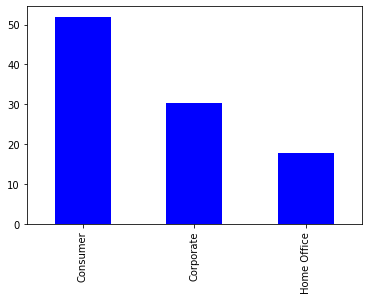

In [17]:
S=(df['Segment'].value_counts()/len(df['Segment'])*100).plot(kind='bar',color='b')

In [18]:
#analyzing the ship mode 
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

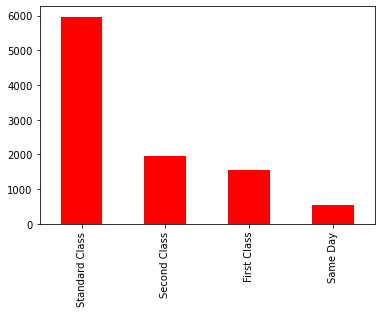

In [22]:
T=(df['Ship Mode'].value_counts()).plot(kind='bar',color='r')

In [21]:
#Analysis category of items in the supermart
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

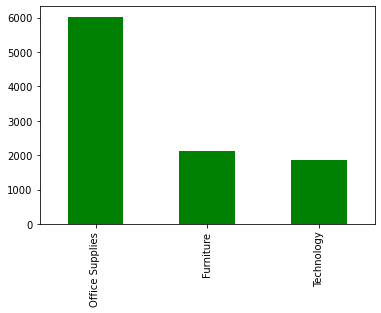

In [24]:
T=(df['Category'].value_counts()).plot(kind='bar',color='g')

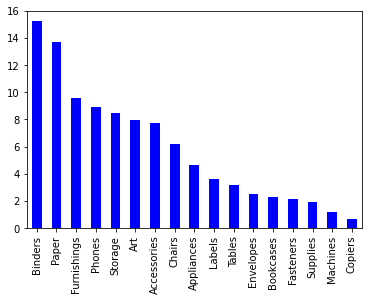

In [26]:
#Analysis sub-category of items in the supermart
S=(df['Sub-Category'].value_counts()/len(df['Sub-Category'])*100).plot(kind='bar',color='b')

Bivariate Analysis

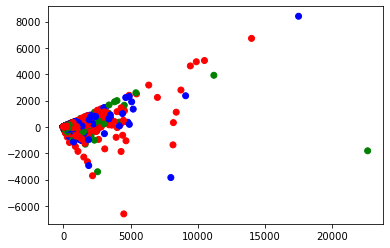

In [32]:
fig, ax = plt.subplots()
colors = {'Consumer': 'r', 'Corporate': 'b','Home Office':'g'}
ax.scatter(df['Sales'],df['Profit'], c=df['Segment'].apply(lambda x:colors[x]))
plt.show()

In [33]:
df.pivot_table(values='Sales', index='Segment', columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


In [34]:
df.pivot_table(values='Profit', index='Segment', columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


<AxesSubplot:ylabel='Frequency'>

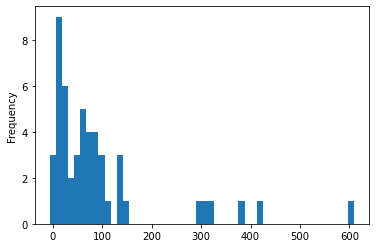

In [35]:
temp_df = df.loc[(df['Segment']=='Consumer')&(df['Discount']==0.1)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

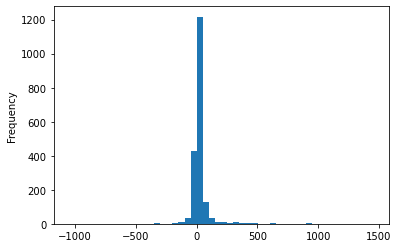

In [36]:
temp_df = df.loc[(df['Segment']=='Consumer')&(df['Discount']==0.2)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

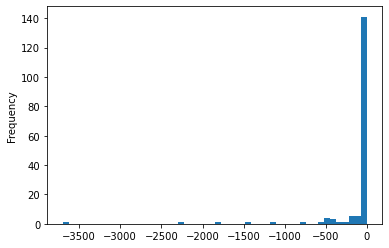

In [37]:
temp_df = df.loc[(df['Segment']=='Consumer')&(df['Discount']==0.8)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

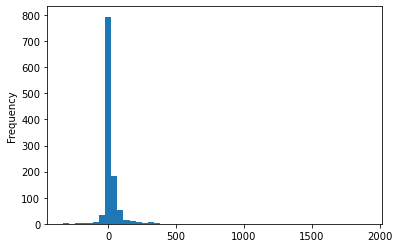

In [39]:
temp_df = df.loc[(df['Segment']=='Corporate')&(df['Discount']==0.2)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

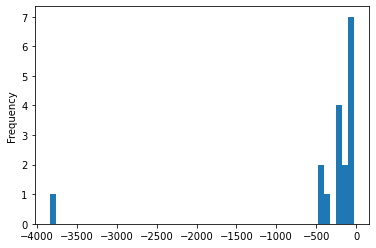

In [40]:
temp_df = df.loc[(df['Segment']=='Corporate')&(df['Discount']==0.5)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

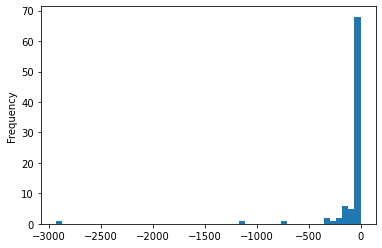

In [41]:
temp_df = df.loc[(df['Segment']=='Corporate')&(df['Discount']==0.8)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

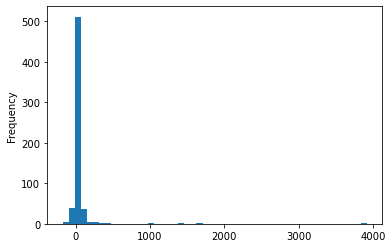

In [43]:
temp_df = df.loc[(df['Segment']=='Home Office')&(df['Discount']==0.2)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

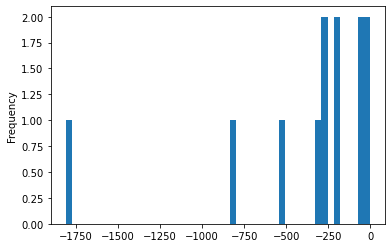

In [44]:
temp_df = df.loc[(df['Segment']=='Home Office')&(df['Discount']==0.5)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

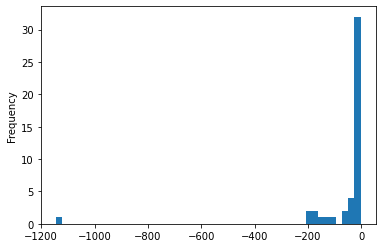

In [45]:
temp_df = df.loc[(df['Segment']=='Home Office')&(df['Discount']==0.8)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

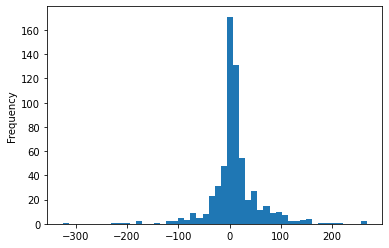

In [46]:
temp_df = df.loc[(df['Category']=='Furniture')&(df['Discount']==0.2)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

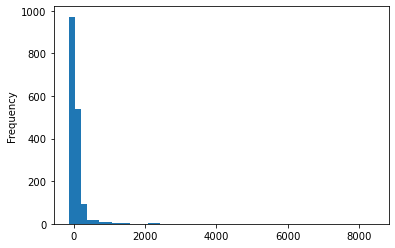

In [51]:
temp_df = df.loc[(df['Category']=='Technology')&(df['Discount']<=0.3)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

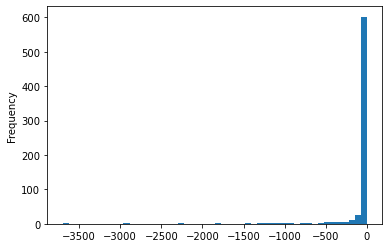

In [52]:
temp_df = df.loc[(df['Category']=='Office Supplies')&(df['Discount']>=0.3)]
temp_df['Profit'].plot.hist(bins=50)

<AxesSubplot:xlabel='Segment,Discount'>

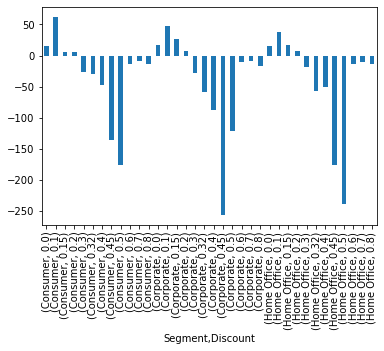

In [57]:
temp = df.groupby(['Segment','Discount']).Profit.median()
temp.plot(kind = 'bar', stacked = True)